# Logistic Regression
Fits a sigmoid curve on classifcation dataset

Sigmoid curve gives probability of prediction

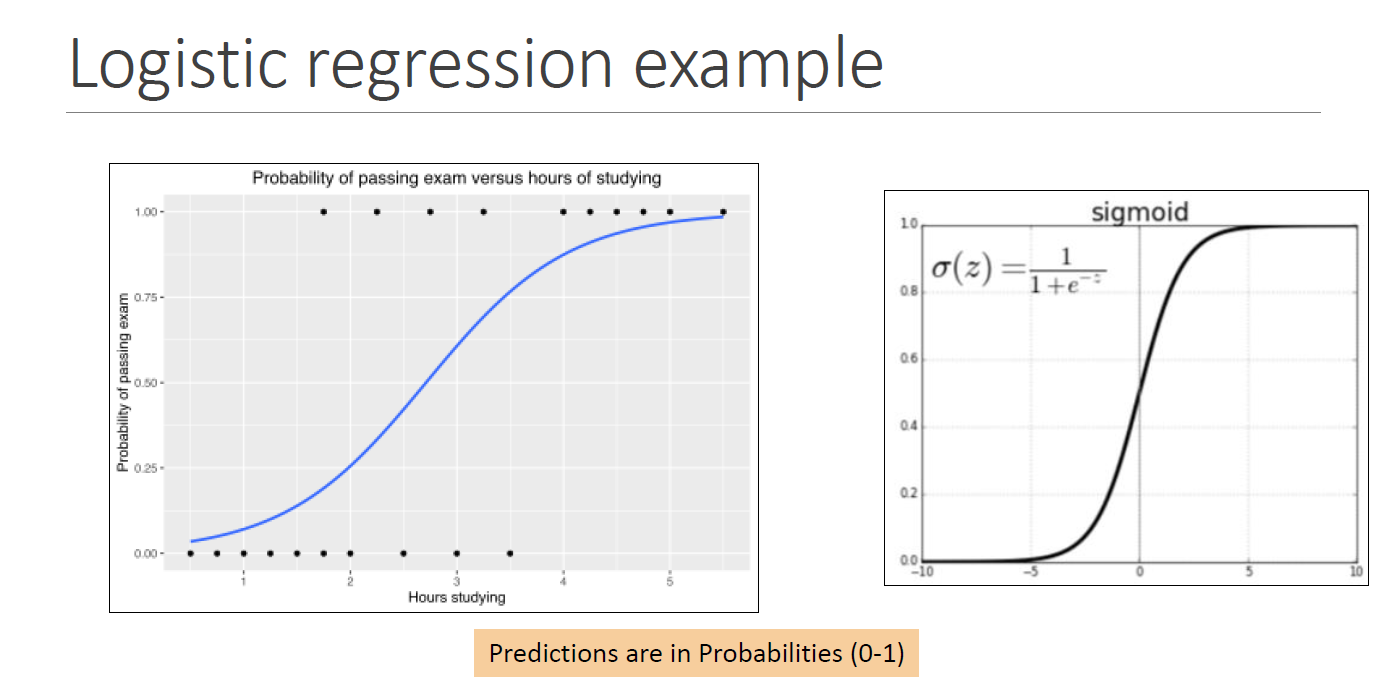

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### Step 1: Read the train dataset

In [2]:
import pandas as pd 
df = pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Step 2: Perform basic data quality checks

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
m = df.isna().sum()
m

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
df.duplicated().sum()

1

### Step 3: Seperate X and Y(species)

In [6]:
X = df.drop(columns=['species'])
Y = df[['species']]

In [7]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
Y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [9]:
Y.value_counts()

species   
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

<Axes: xlabel='species'>

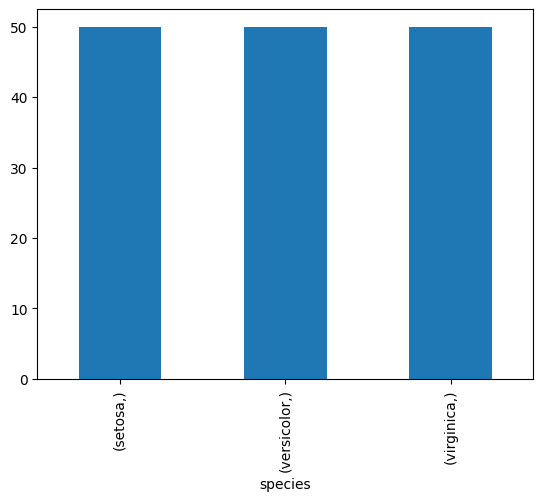

In [10]:
Y.value_counts().plot(kind='bar')

### Step 4: Apply Preprocessing for X

In [11]:
X.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
dtype: object

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [13]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='mean')),
                           ('scaler', StandardScaler())]).set_output(transform='pandas')

In [14]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


### Step 5: Apply Train test split

In [18]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.33, random_state=21)

In [19]:
xtrain.head()

,sepal_length,sepal_width,petal_length,petal_width
52,1.280340,0.098217,0.649083,0.395774
49,-1.021849,0.558611,-1.340227,-1.315444
65,1.038005,0.098217,0.364896,0.264142
118,2.249683,-1.052767,1.785832,1.448832
55,-0.173674,-0.592373,0.421734,0.132510


In [20]:
ytrain.head()

,species
52,versicolor
49,setosa
65,versicolor
118,virginica
55,versicolor


In [21]:
xtest.head()

,sepal_length,sepal_width,petal_length,petal_width
92,-0.052506,-1.052767,0.137547,0.000878
44,-0.900681,1.709595,-1.056039,-1.052180
7,-1.021849,0.788808,-1.283389,-1.315444
21,-0.900681,1.479398,-1.283389,-1.052180
95,-0.173674,-0.131979,0.251221,0.000878


In [22]:
ytest.head()

,species
92,versicolor
44,setosa
7,setosa
21,setosa
95,versicolor


In [23]:
xtrain.shape

(100, 4)

In [24]:
xtest.shape

(50, 4)

### Step 6: Build the model

In [25]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(xtrain, ytrain)

LogisticRegression()

### Step 7 : Evaluate the model

In [26]:
# Accuracy in train
model.score(xtrain, ytrain)

0.98

In [27]:
# Accuracy in test
model.score(xtest, ytest)

0.94

In [28]:
# Predict results for train and test
ypred_train = model.predict(xtrain)
ypred_test = model.predict(xtest)

In [29]:
ypred_train[0:5]

array(['versicolor', 'setosa', 'versicolor', 'virginica', 'versicolor'],
      dtype=object)

In [30]:
ytrain.head()

,species
52,versicolor
49,setosa
65,versicolor
118,virginica
55,versicolor


In [31]:
ypred_test[0:5]

array(['versicolor', 'setosa', 'setosa', 'setosa', 'versicolor'],
      dtype=object)

In [32]:
ytest.head()

,species
92,versicolor
44,setosa
7,setosa
21,setosa
95,versicolor


In [33]:
# Probabilites of prediction
yprob_train = model.predict_proba(xtrain)
yprob_test = model.predict_proba(xtest)

In [35]:
model.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [34]:
yprob_train[0:5]

array([[5.80737884e-03, 6.45138135e-01, 3.49054486e-01],
       [9.62785569e-01, 3.72137583e-02, 6.73146323e-07],
       [1.67610228e-02, 8.34067583e-01, 1.49171394e-01],
       [9.22132912e-08, 2.79700806e-03, 9.97202900e-01],
       [2.87506448e-02, 8.34342620e-01, 1.36906735e-01]])

In [36]:
yprob_test[0:5]

array([[2.06349625e-02, 9.12983142e-01, 6.63818957e-02],
       [9.87155547e-01, 1.28438943e-02, 5.58381230e-07],
       [9.72240034e-01, 2.77594519e-02, 5.13857865e-07],
       [9.85931171e-01, 1.40684351e-02, 3.93678025e-07],
       [8.82040990e-02, 8.60869769e-01, 5.09261315e-02]])

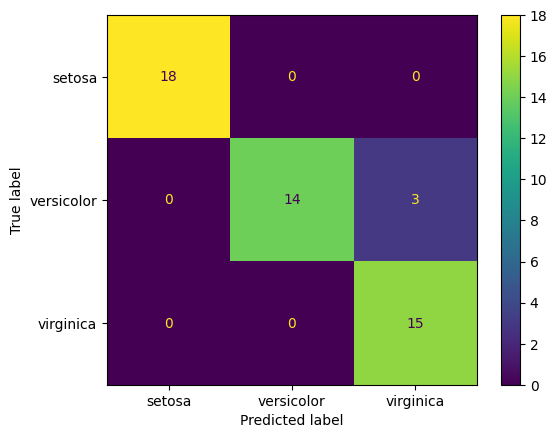

In [37]:
# Plot confusion matrix on test data
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_test)
cfd = ConfusionMatrixDisplay(cf, display_labels=model.classes_)
cfd.plot()

In [38]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       1.00      0.82      0.90        17
   virginica       0.83      1.00      0.91        15

    accuracy                           0.94        50
   macro avg       0.94      0.94      0.94        50
weighted avg       0.95      0.94      0.94        50



### Above is a good model because f1_macro scores is more than 0.80

### Step 8: Out of sample predictions

In [39]:
xnew = pd.read_csv('iris_sample.csv')
xnew

,sepal_length,sepal_width,petal_length,petal_width
0,5.5,2.5,4.0,1.3
1,6.9,3.1,5.1,2.3
2,5.1,2.5,3.0,1.1
3,4.4,2.9,NaN,0.2
4,5.9,3.0,5.1,1.8
5,5.5,3.5,1.3,0.2
6,5.6,NaN,3.6,1.3
7,6.5,3.0,5.2,2.0
8,5.3,3.7,1.5,0.2
9,5.1,3.4,1.5,NaN


In [40]:
num_pipe

Pipeline(steps=[('impute', SimpleImputer()), ('scaler', StandardScaler())])

In [41]:
# Apply pre.transform on xnew
xnew_pre = num_pipe.transform(xnew)
xnew_pre

,sepal_length,sepal_width,petal_length,petal_width
0,-0.416010,-1.282963,0.137547,0.132510
1,1.280340,0.098217,0.762758,1.448832
2,-0.900681,-1.282963,-0.430828,-0.130755
3,-1.748856,-0.362176,0.000000,-1.315444
4,0.068662,-0.131979,0.762758,0.790671
5,-0.416010,1.019004,-1.397064,-1.315444
6,-0.294842,0.000000,-0.089803,0.132510
7,0.795669,-0.131979,0.819596,1.053935
8,-0.658345,1.479398,-1.283389,-1.315444
9,-0.900681,0.788808,-1.283389,0.000000


### Get the predictions

In [42]:
preds = model.predict(xnew_pre)
preds

array(['versicolor', 'virginica', 'versicolor', 'setosa', 'virginica',
       'setosa', 'versicolor', 'virginica', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'versicolor', 'virginica'],
      dtype=object)

In [44]:
model.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [43]:
probs = model.predict_proba(xnew_pre)
probs

array([[1.94050069e-02, 8.82384476e-01, 9.82105171e-02],
       [1.81669512e-04, 6.72987186e-02, 9.32519612e-01],
       [9.77012536e-02, 8.91457274e-01, 1.08414723e-02],
       [7.43177367e-01, 2.56648602e-01, 1.74030989e-04],
       [5.92310057e-03, 3.32280648e-01, 6.61796252e-01],
       [9.63442526e-01, 3.65569693e-02, 5.04873633e-07],
       [1.61079503e-01, 8.11265890e-01, 2.76546072e-02],
       [7.60375074e-04, 1.55517321e-01, 8.43722304e-01],
       [9.85175030e-01, 1.48247641e-02, 2.05885592e-07],
       [8.87613168e-01, 1.12300738e-01, 8.60943583e-05],
       [2.31955647e-02, 8.97183462e-01, 7.96209736e-02],
       [2.64080839e-02, 9.47915023e-01, 2.56768935e-02],
       [3.44535627e-06, 1.34027521e-02, 9.86593803e-01],
       [5.80737884e-03, 6.45138135e-01, 3.49054486e-01],
       [4.96593323e-04, 4.04245547e-01, 5.95257860e-01]])

In [45]:
import numpy as np 
max_probs = np.max(probs, axis=1)
max_probs

array([0.88238448, 0.93251961, 0.89145727, 0.74317737, 0.66179625,
       0.96344253, 0.81126589, 0.8437223 , 0.98517503, 0.88761317,
       0.89718346, 0.94791502, 0.9865938 , 0.64513813, 0.59525786])

### Save above results in dataframe

In [46]:
xnew['species_pred'] = preds
xnew['prob'] = max_probs

In [47]:
xnew

,sepal_length,sepal_width,petal_length,petal_width,species_pred,prob
0,5.5,2.5,4.0,1.3,versicolor,0.882384
1,6.9,3.1,5.1,2.3,virginica,0.932520
2,5.1,2.5,3.0,1.1,versicolor,0.891457
3,4.4,2.9,NaN,0.2,setosa,0.743177
4,5.9,3.0,5.1,1.8,virginica,0.661796
5,5.5,3.5,1.3,0.2,setosa,0.963443
6,5.6,NaN,3.6,1.3,versicolor,0.811266
7,6.5,3.0,5.2,2.0,virginica,0.843722
8,5.3,3.7,1.5,0.2,setosa,0.985175
9,5.1,3.4,1.5,NaN,setosa,0.887613


In [48]:
xnew['species_pred'].value_counts()

species_pred
versicolor    6
virginica     5
setosa        4
Name: count, dtype: int64

<Axes: xlabel='species_pred'>

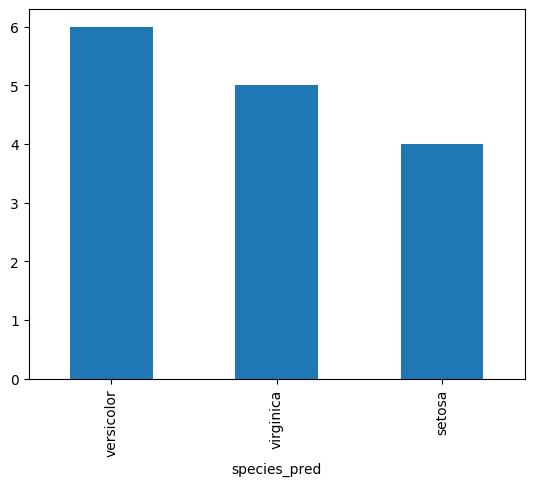

In [49]:
xnew['species_pred'].value_counts().plot(kind='bar')

### Save above results to csv

In [50]:
xnew.to_csv('Results.csv', index=False)